# Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from collections import Counter, OrderedDict
import calendar

import plot_help

%matplotlib inline

## Load the Data

In [2]:
#location of file
review_dir = 'data/review.json'

In [3]:
#set the chunk size
c_size = 100_000

#store chunks in list
chunk_list = []

#return JsonReader object
review_df_chunk = pd.read_json(review_dir, orient='columns',lines=True, chunksize=c_size)

#loop over chunks
for df in review_df_chunk:
    chunk_list.append(df)
    
#combine results in one dataframe
review_df= pd.concat(chunk_list)

In [4]:
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [5]:
#general shape
review_df.shape

(6685900, 9)

In [6]:
# null Entries
review_df.isna().mean()

business_id    0.0
cool           0.0
date           0.0
funny          0.0
review_id      0.0
stars          0.0
text           0.0
useful         0.0
user_id        0.0
dtype: float64

In [7]:
#list unique entries and compare with other dataframes
# !NOTE! take a while to run, uncomment to save on time
#review_df.nunique()

business_id     192606
cool               201
date           6552820
funny              231
review_id      6685900
stars                5
text           6668738
useful             289
user_id        1637138
dtype: int64

In [8]:
review_df.dtypes

business_id            object
cool                    int64
date           datetime64[ns]
funny                   int64
review_id              object
stars                   int64
text                   object
useful                  int64
user_id                object
dtype: object

In [9]:
review_df.describe()

,cool,funny,stars,useful
count,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06
mean,5.787708e-01,4.827667e-01,3.716199e+00,1.354134e+00
std,2.359024e+00,2.378646e+00,1.463643e+00,3.700192e+00
min,-1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00
max,5.060000e+02,1.290000e+03,5.000000e+00,1.241000e+03


## cool

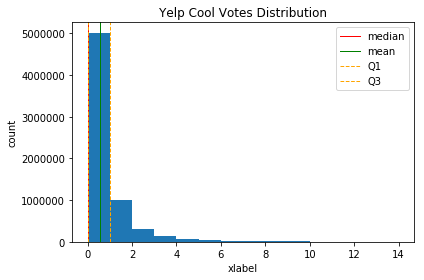

In [19]:
plot_help.plot_hist(review_df['cool'], feature='Cool Votes',end=15,step=1)

## funny

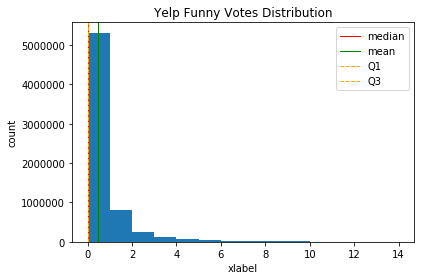

In [11]:
plot_help.plot_hist(review_df['funny'], feature='Funny Votes',end=15,step=1)

## stars

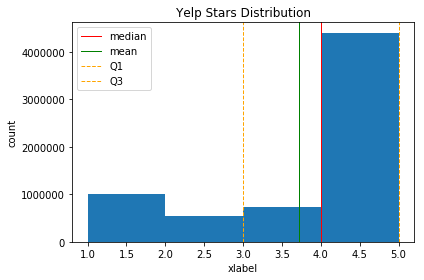

In [16]:
plot_help.plot_hist(review_df['stars'], feature='Stars', start=1,end=6,step=1)

## useful

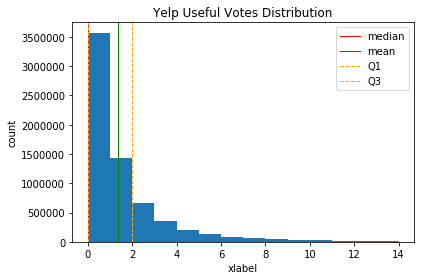

In [18]:
plot_help.plot_hist(review_df['useful'], feature='Useful Votes',end=15,step=1)

## date

At a quick glange, we note  that the dates are not necessarily sorted. In addition, the data is `6685900` rows however there are `6552820` unique time stamps, this means that some reviews might have been logged at the same time.

In [ ]:
#sort by date from oldest to most current
review_sort_date = review_df.sort_values('date', ascending=True)

In [24]:
#create a goupby object by day of year
review_groupby_doy = review_df.groupby(review_df.date.dt.dayofyear, as_index=True)

In [26]:
#create a summation df
review_doy_sum = review_groupby_doy.sum()

#create a mean df
review_doy_mean = review_groupby_doy.mean()

In [37]:
review_doy_sum.columns

Index(['cool', 'funny', 'stars', 'useful'], dtype='object')

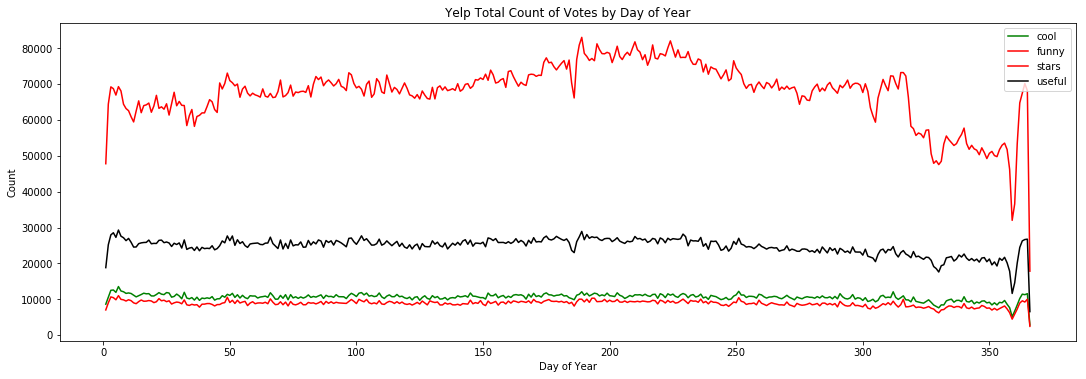

In [47]:
plt.figure(figsize=(15,5))

plt.plot(review_doy_sum.index, review_doy_sum['cool'], color='green', label='cool')
plt.plot(review_doy_sum.index, review_doy_sum['funny'], color='red', label='funny')
plt.plot(review_doy_sum.index, review_doy_sum['stars'], color='red', label='stars')
plt.plot(review_doy_sum.index, review_doy_sum['useful'], color='k', label='useful')
plt.tight_layout()
plt.legend(loc='upper right')
plt.title("Yelp Total Count of Votes by Day of Year")
plt.xlabel("Day of Year")
plt.ylabel("Count")
plt.show()
